In [1]:
# Plotting multiple stocks

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt

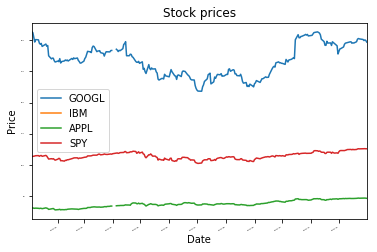

In [15]:
def symbol_to_path(symbol, base_dir='../app/data'):
    """Return CSV file path given ticker symbol."""
    return os.path.join(base_dir, "{}.csv".format(str(symbol)))

def get_data(symbols, dates):
    """Read stock data (adjusted close) for given symbols from CSV files."""
    df = pd.DataFrame(index=dates)
    if 'SPY' not in symbols:
        symbols.insert(0, 'SPY')
    
    for symbol in symbols:
        path = symbol_to_path(symbol)
        df_temp = pd.read_csv(path, index_col='Date', parse_dates=True, usecols=['Date', 'Close'], na_values=['nan'])
        df_temp = df_temp.rename(columns={'Close': symbol})
        df = df.join(df_temp)
        if symbol == 'SPY': # drop dates SPY did not trade
            df = df.dropna(subset=['SPY'])
    
    return df

def plot_data(df, title='Stock prices'):
    '''Plot stock prices'''
    ax = df.plot(title=title,fontsize=2) # ax is such a handler name it ax for axis
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    plt.show() # must be called to show plots in some environments

def test_run():
    # Define a date range
    dates = pd.date_range('2010-01-01', '2010-12-31') # the year 2010
    
    symbols = ['GOOGL', "IBM", "APPL", "SPY"]
    # Get stock data
    df = get_data(symbols, dates)
    
    plot_data(df)

if __name__ == '__main__':
    test_run()


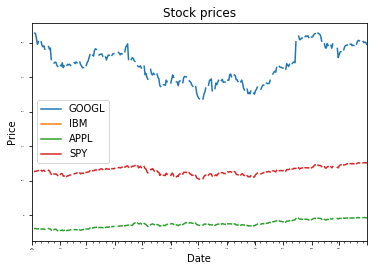

In [16]:
def symbol_to_path(symbol, base_dir='../app/data'):
    """Return CSV file path given ticker symbol."""
    return os.path.join(base_dir, "{}.csv".format(str(symbol)))

def get_data(symbols, dates):
    """Read stock data (adjusted close) for given symbols from CSV files."""
    df = pd.DataFrame(index=dates)
    if 'SPY' not in symbols:
        symbols.insert(0, 'SPY')
    
    for symbol in symbols:
        path = symbol_to_path(symbol)
        df_temp = pd.read_csv(path, index_col='Date', parse_dates=True, usecols=['Date', 'Close'], na_values=['nan'])
        df_temp = df_temp.rename(columns={'Close': symbol})
        df = df.join(df_temp)
        #if symbol == 'SPY': # drop dates SPY did not trade
        #    df = df.dropna(subset=['SPY'])
    
    return df

def plot_data(df, title='Stock prices'):
    '''Plot stock prices'''
    ax = df.plot(title=title,fontsize=2) # ax is such a handler name it ax for axis
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    plt.show() # must be called to show plots in some environments

def test_run():
    # Define a date range
    dates = pd.date_range('2010-01-01', '2010-12-31') # the year 2010
    
    symbols = ['GOOGL', "IBM", "APPL", "SPY"]
    # Get stock data
    df = get_data(symbols, dates)
    
    plot_data(df)

if __name__ == '__main__':
    test_run()


In [17]:
# if not drop the date which spy did not trade
# you can see dot line

In [18]:
# Slice and plot two stocks

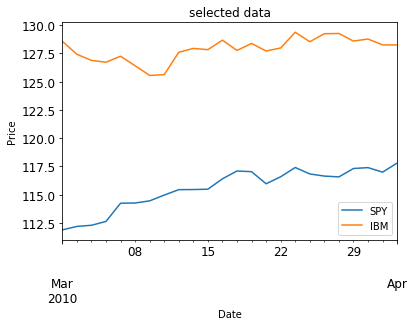

In [36]:
"""Slice and plot"""

import os
import pandas as pd
import matplotlib.pyplot as plt

df = None
def plot_selected(df, columns, start_index, end_index):
    """Plot the desired columns over index values in the given range."""
    # TODO: Your code here
    # Note: DO NOT modify anything else!
    plot_data(df.ix[start_index:end_index, columns], title='selected data')
    plt.show()

def symbol_to_path(symbol, base_dir='../app/data'):
    """Return CSV file path given ticker symbol."""
    return os.path.join(base_dir, "{}.csv".format(str(symbol)))

def get_data(symbols, dates):
    """Read stock data (adjusted close) for given symbols from CSV files."""
    global df 
    df = pd.DataFrame(index=dates)
    if 'SPY' not in symbols:  # add SPY for reference, if absent
        symbols.insert(0, 'SPY')

    for symbol in symbols:
        path = symbol_to_path(symbol)
        df_temp = pd.read_csv(path, index_col='Date',parse_dates=True, usecols=['Date', 'Close'], na_values=['nan'])
        df_temp = df_temp.rename(columns={'Close': symbol})
        df = df.join(df_temp)
        if symbol == 'SPY':  # drop dates SPY did not trade
            df = df.dropna(subset=["SPY"])

    return df


def plot_data(df, title="Stock prices"):
    """Plot stock prices with a custom title and meaningful axis labels."""
    ax = df.plot(title=title, fontsize=12)
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    plt.show()


def test_run():
    # Define a date range
    dates = pd.date_range('2010-01-01', '2010-12-31')

    # Choose stock symbols to read
    symbols = ['GOOGL', 'IBM', 'APPL']  # SPY will be added in get_data()
    
    # Get stock data
    df = get_data(symbols, dates)

    # Slice and plot
    plot_selected(df, ['SPY', 'IBM'], '2010-03-01', '2010-04-01')


if __name__ == "__main__":
    test_run()


In [26]:
ibm = pd.read_csv('../app/data/IBM.csv')

In [28]:
ibm.ix['2010-03-01':'2012-04-01']

,Date,Open,High,Low,Close,Volume


In [48]:
dates = pd.date_range('2010-01-01', '2010-12-31')
symbols = ['GOOGL', 'IBM', 'APPL']
df = get_data(symbols, dates)

In [55]:
n = df.ix[0]

In [56]:
type(n)

pandas.core.series.Series

In [57]:
n

SPY      113.33
GOOGL    313.69
IBM      132.45
APPL      30.57
Name: 2010-01-04 00:00:00, dtype: float64

In [58]:
n.plot()

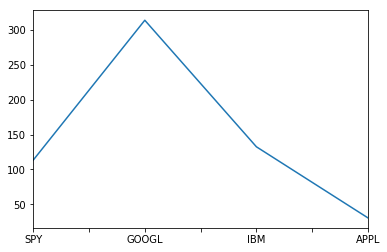

In [59]:
plt.show()

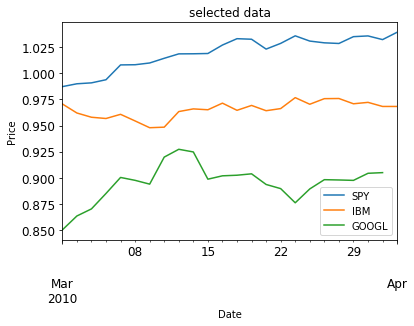

In [62]:
# Normalizing

import os
import pandas as pd
import matplotlib.pyplot as plt

df = None
def plot_selected(df, columns, start_index, end_index):
    """Plot the desired columns over index values in the given range."""
    # TODO: Your code here
    # Note: DO NOT modify anything else!
    plot_data(df.ix[start_index:end_index, columns], title='selected data')
    plt.show()

def symbol_to_path(symbol, base_dir='../app/data'):
    """Return CSV file path given ticker symbol."""
    return os.path.join(base_dir, "{}.csv".format(str(symbol)))

def normalize_data(df):
    return df/df.ix[0,:]

def get_data(symbols, dates):
    """Read stock data (adjusted close) for given symbols from CSV files."""
    global df 
    df = pd.DataFrame(index=dates)
    if 'SPY' not in symbols:  # add SPY for reference, if absent
        symbols.insert(0, 'SPY')

    for symbol in symbols:
        path = symbol_to_path(symbol)
        df_temp = pd.read_csv(path, index_col='Date',parse_dates=True, usecols=['Date', 'Close'], na_values=['nan'])
        df_temp = df_temp.rename(columns={'Close': symbol})
        df = df.join(df_temp)
        if symbol == 'SPY':  # drop dates SPY did not trade
            df = df.dropna(subset=["SPY"])

    return df


def plot_data(df, title="Stock prices"):
    """Plot stock prices with a custom title and meaningful axis labels."""
    ax = df.plot(title=title, fontsize=12)
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    plt.show()


def test_run():
    # Define a date range
    dates = pd.date_range('2010-01-01', '2010-12-31')

    # Choose stock symbols to read
    symbols = ['GOOGL', 'IBM', 'APPL']  # SPY will be added in get_data()
    
    # Get stock data
    df = get_data(symbols, dates)
    df = normalize_data(df)
    
    # Slice and plot
    plot_selected(df, ['SPY', 'IBM', 'GOOGL'], '2010-03-01', '2010-04-01')


if __name__ == "__main__":
    test_run()
